# Exercise 2

In [16]:
import math
from string import punctuation
from typing import List, Dict
from nltk import PorterStemmer
from collections import Counter
from pprint import pprint


def get_list_of_words_chapter(file_name: str) -> List[str]:
    with open(file_name, encoding="UTF-8") as f:
        words = [word for line in f for word in line.split()]
    return words


with open("stopwords.txt", encoding="UTF-8") as f:
    stopwords = [stopword.rstrip() for stopword in f]


def normalize(words: List[str]) -> Dict[str, int]:
    no_pun_words = [word.lower().translate(str.maketrans('', '', punctuation)) for word in words]
    filtered_words = [w for w in no_pun_words if not w in stopwords and not len(w) == 0]
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in filtered_words]
    term_count_dict = dict(Counter(stemmed_words))
    return term_count_dict

In [17]:
import pathlib

doc_term_count_dict = {}
for filepath in pathlib.Path('.').iterdir():
    if str(filepath).startswith("dune_"):
        read_words = get_list_of_words_chapter(file_name=str(filepath))
        doc_term_count_dict[str(filepath)] = normalize(words=read_words)

doc_term_count_dict
# pprint(groupred_pairs_dict)

{'dune_25.txt': {'father': 4,
  'padishah': 1,
  'emperor': 1,
  'heard': 7,
  'duke': 5,
  'leto': 2,
  'death': 2,
  'manner': 1,
  'went': 1,
  'rage': 2,
  'never': 1,
  'seen': 3,
  'blame': 3,
  'mother': 4,
  'compact': 3,
  'forc': 1,
  'place': 3,
  'bene': 4,
  'gesserit': 4,
  'throne': 1,
  'guild': 1,
  'evil': 1,
  'old': 1,
  'baron': 1,
  'everyon': 1,
  'sight': 2,
  'except': 1,
  'even': 4,
  'said': 17,
  'witch': 1,
  'like': 8,
  'other': 1,
  'sought': 1,
  'comfort': 1,
  'say': 1,
  'done': 1,
  'accord': 1,
  'older': 1,
  'law': 1,
  'selfpreserv': 1,
  'ancient': 4,
  'ruler': 1,
  'gave': 2,
  'allegi': 1,
  'sneer': 1,
  'ask': 4,
  'thought': 7,
  'weakl': 1,
  'saw': 5,
  'arous': 1,
  'passion': 1,
  'concern': 1,
  'dead': 1,
  'impli': 1,
  'royalti': 1,
  'look': 5,
  'back': 3,
  'think': 2,
  'may': 1,
  'prescienc': 1,
  'certain': 3,
  'line': 5,
  'muaddib': 1,
  'share': 1,
  'common': 1,
  'ancestri': 1,
  'hous': 1,
  'princess': 1,
  'irulan

In [18]:
def get_term_frequency(term: str, document: str, doc_term_count_dict: Dict[str, Dict[str, int]]) -> int:
    return doc_term_count_dict[document][term]

In [19]:
def get_number_of_documents_with_term(term: str, doc_term_count_dict: Dict[str, Dict[str, int]]) -> int:
    document_count = 0
    for document_words_dict in doc_term_count_dict.items():
        if term in document_words_dict[1]:
            document_count += 1
    return document_count

# print(get_number_of_documents_with_term("jessica", groupred_pairs_dict))

In [20]:
def get_inverse_document_frequency(term: str, document: str, doc_term_count_dict: Dict[str, Dict[str, int]]) -> float:
    D_cardinality = len(doc_term_count_dict.keys())
    docs_with_term_cardinality = get_number_of_documents_with_term(term=term, doc_term_count_dict=doc_term_count_dict)
    return math.log(D_cardinality / (1 + docs_with_term_cardinality))

In [21]:
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


def make_word_cloud(term_tfidf_dict: Dict[str, float]):
    alice_mask = np.array(Image.open("mask_dune.png"))
    wc = WordCloud(background_color="white", max_words=1000, mask=alice_mask)
    wc.generate_from_frequencies(term_tfidf_dict)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [22]:
doc_term_tfidf_dict = {}
for document, term_count_dict in doc_term_count_dict.items():
    doc_term_tfidf_dict[document] = {}
    for term, term_count in term_count_dict.items():
        tf = get_term_frequency(term=term, document=document, doc_term_count_dict=doc_term_count_dict)
        idf = get_inverse_document_frequency(term=term, document=document, doc_term_count_dict=doc_term_count_dict)
        tfidf = tf * idf
        doc_term_tfidf_dict[document][term] = tfidf
# pprint(doc_term_tfidf_dict)

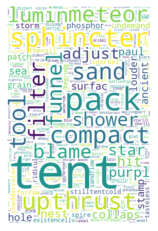

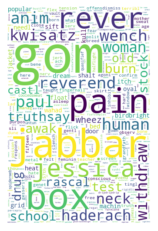

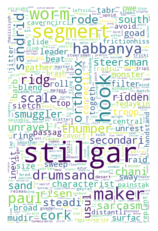

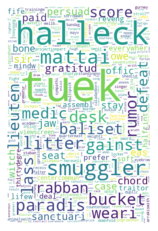

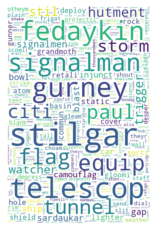

KeyboardInterrupt: 

In [23]:
for _, term_tfidf_dicts in doc_term_tfidf_dict.items():
    make_word_cloud(term_tfidf_dicts)

# Exercise 3

In [24]:
def get_the_best_matching_chapters(term: str, doc_term_tfidf_dict: Dict[str, Dict[str, Dict[str, float]]]):
    matching_documents = {}
    for document, term_tfidf_dicts in doc_term_tfidf_dict.items():
        if term in term_tfidf_dicts:
            matching_documents[document] = term_tfidf_dicts[term]
    sorted_matching_documents = {k: v for k, v in sorted(matching_documents.items(), key=lambda item: item[1], reverse=True)}
    best_matching_documents = [doc for doc in sorted_matching_documents.keys()]
    return best_matching_documents

In [15]:
print("water:", get_the_best_matching_chapters(term="water", doc_term_tfidf_dict=doc_term_tfidf_dict))
print()
print("sand:", get_the_best_matching_chapters(term="sand", doc_term_tfidf_dict=doc_term_tfidf_dict))
print()
print("pain:", get_the_best_matching_chapters(term="pain", doc_term_tfidf_dict=doc_term_tfidf_dict))
print()

water: ['dune_17.txt', 'dune_36.txt', 'dune_26.txt', 'dune_52.txt', 'dune_56.txt', 'dune_39.txt', 'dune_29.txt', 'dune_32.txt', 'dune_48.txt', 'dune_35.txt', 'dune_11.txt', 'dune_9.txt', 'dune_31.txt', 'dune_16.txt', 'dune_33.txt', 'dune_5.txt', 'dune_43.txt', 'dune_8.txt', 'dune_51.txt', 'dune_44.txt', 'dune_47.txt', 'dune_13.txt', 'dune_12.txt', 'dune_38.txt', 'dune_23.txt', 'dune_4.txt', 'dune_25.txt', 'dune_53.txt', 'dune_34.txt', 'dune_28.txt', 'dune_2.txt', 'dune_45.txt', 'dune_49.txt', 'dune_20.txt', 'dune_54.txt', 'dune_15.txt', 'dune_6.txt', 'dune_22.txt', 'dune_14.txt', 'dune_46.txt', 'dune_10.txt']

sand: ['dune_29.txt', 'dune_16.txt', 'dune_31.txt', 'dune_43.txt', 'dune_32.txt', 'dune_25.txt', 'dune_45.txt', 'dune_56.txt', 'dune_26.txt', 'dune_46.txt', 'dune_20.txt', 'dune_52.txt', 'dune_49.txt', 'dune_27.txt', 'dune_38.txt', 'dune_50.txt', 'dune_12.txt', 'dune_37.txt', 'dune_39.txt', 'dune_23.txt', 'dune_13.txt', 'dune_2.txt', 'dune_53.txt', 'dune_34.txt', 'dune_51.txt', '